Fourier Transforms
=====
# Barry O'Donnell

## 12/02/2020

**Fourier Transforms** are a mathematical technique that can be used to distinguish dominant frequencies within a signal. This can be very helpful with signal and image analysis.

In this experiment, we are going to be observing some signal, and observe the **Fourier Transform** of said signal, and other aspects of the **Fourier Transform** technique

In [1]:
## Begin by importing modules and functions needed to complete the assignment
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft

In [2]:
## After reaching Task 6, I restarted the assignment and made everyhting a function
##  I found that this was easier to debug and call multiple times


def signal_sim(fsig, get=False, show=True, f2sig=None):
    """
    Simulates a signal of 'fsig' Hz
    
    args;
        fsig:= float/int, represents Signal frequency
        get:= Bool, checks if user requests 'ysig'
        show:= Bool, checks if user requests graphs
        f2sig:= float/int, represents another Signal frequency
    
    Returns array 'ysig', 't' if 'get'=True.
    """
    
    ## Calculate time domain and compute the signal
    t = np.linspace(0, (1/fsig)*5, 1000)
    ysig = np.sin(2 * np.pi * fsig * t)
    
    ## Checks if a second signal is being considered
    if f2sig is not None:
        ysig += (1/2) * np.sin(2 * np.pi * f2sig * t)

    ## Checks if user wishes to show graph
    if show:
        plt.plot(t, ysig, '-b')
        plt.ylim(-2,2)
        plt.xlim(0, 2/fsig)
        plt.xlabel('Time (s)')
        plt.ylabel('Intensity ($Wm^{-2}$)')
        plt.grid()
        plt.show()

    ## Checks if user wants the arrays
    if get:
        return ysig, t
    
    
    

def signal_samp(fsig, fsamp, Nsamp=32, get=False, show=True, noise=False, noise_amount=0.2, f2sig=None):
    """
    Samples a signal of 'fsig' Hz at 'fsamp' Hz
    
    args;
        fsig:= float/int, represents Signal frequency
        fsamp:= float/int, repr. Sampling frequency
        Nsamp:= int, repr. amount of samples taken
        get:= Bool, checks if user requests 'ysig'
        show:= Bool, checks if user requests graphs
        noise:= Bool, checks if user requests noise on graph
        noise_amount:= float, std. dev of Gaussian Noise
        f2sig:= float/int, represents another Signal frequency
        
    Returns array 'ysamp', 't' if 'get'=True
    """
    
    ## Calculates time domain
    Tsamp = 1/fsamp
    tsamp = np.zeros(Nsamp)
    for i in range(Nsamp):
        tsamp[i] = i*Tsamp

    ## Calculates the sample signal
    ysamp = np.zeros(Nsamp)
    
    ## Begin 'for' loop to calculate signal at each sample point
    for i in range(Nsamp):
        
        ## Checks if 'noise' is needed
        if noise:
            ## Checks if a second signal is being observed
            ##  The np.random.normal(1, Nsamps) was used incorrectly I believe.
            ##  This would mean its centre peak was at 1, with a std. dev. of 32 for example
            ##  I modified it to  have centre of 0, and std. dev. of 0.2
            if f2sig is not None:
                ysamp[i] = np.sin(2 * np.pi * fsig * tsamp[i]) + (1/2)*np.sin(2 * np.pi * f2sig * tsamp[i]) + np.random.normal(0, noise_amount)
            else:
                ysamp[i] = np.sin(2 * np.pi * fsig * tsamp[i]) + np.random.normal(0, noise_amount)
        else:
            ## Similarly, checks if a second signal is being obserevd
            if f2sig is not None:
                ysamp[i] = np.sin(2 * np.pi * fsig * tsamp[i]) + (1/2)*np.sin(2 * np.pi * f2sig * tsamp[i])
            else:
                ysamp[i] = np.sin(2 * np.pi * fsig * tsamp[i])

    ## Checks if user wants to view graph
    if show:
        plt.plot(tsamp, ysamp, 'or')
        plt.plot(tsamp, ysamp, 'r-')
        plt.xlabel('Time (s)')
        plt.ylabel('Intensity ($Wm^{-2}$)')
        plt.show()

    ## Checks if user wants the arrays
    if get:
        return ysamp, tsamp

--------------

## Task 1

In this part, we use the above stated function to simulate a signal.

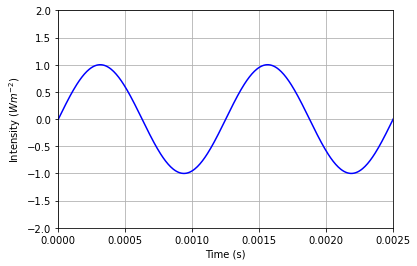

Estimated period: ~0.00125 s
Calculated period: 0.00125 s


In [3]:
fsig = 800

signal_sim(fsig)

print("""Estimated period: ~0.00125 s
Calculated period: {} s""".format(1/fsig))

--------------

## Task 2

We observe the *sample frequency*. The *sample frequency* is a lot higher than the original signal.

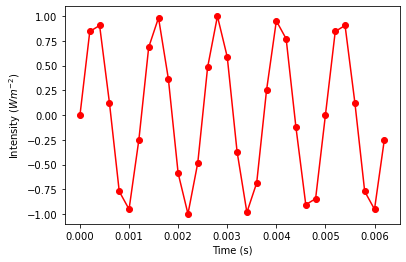

In [4]:
fsig = 800
fsamp = 5000
Nsamp = 32

ysamp, tsamp = signal_samp(fsig, fsamp, Nsamp, get=True)

In [5]:
## Begin 'while' loop to calculate the amount of datapoints for one wave cycle
##  Here, since I know the wave starts at 0, I check how many datapoints are above the intial position.
##  To get how many data points are in a wave cycle, I multiply that number by 2.
i = 1
while ysamp[0] < ysamp[i]:
    i += 1
datapoints = 2 * i

print('Calculated datapoints for sample frequency of 5000 Hz:', datapoints, '\nActual amount of datapoints for a sample frequency of 5000 Hz: 7')

Calculated datapoints for sample frequency of 5000 Hz: 8 
Actual amount of datapoints for a sample frequency of 5000 Hz: 7


--------------

## Task 3

We now move onto **Fourier Transforms**. The technique we are using is the ***Fast Fourier Transform (FFT)***

In [6]:
## Get our 'ysamp' values
ysamp, tsamp = signal_samp(800, 5000, 32, get=True, show=False)

## Use the `numpy` function 'fft()' on our 'ysamp'
Y_FT = fft(ysamp)

print("Length of Y_FT list: ", len(Y_FT))

Length of Y_FT list:  32


In [7]:
## Use `numpy` function 'isreal()' that checks if values in an array are real
np.isreal(Y_FT)

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [8]:
## Calculate the Power Spectrum of the Fourier Transform
Y_POW = Y_FT * np.conj(Y_FT)
np.isreal(Y_POW)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [9]:
def signal_fourier(fsig, fsamp, Nsamp, get=False, show=True, showShift=True, noise=False, noise_amount=0.2, f2sig=None):
    """
    Samples a signal of 'fsig' Hz at 'fsamp' Hz and calcualtes the Fourier Transform
    
    args;
        fsig:= float/int, represents Signal frequency
        fsamp:= float/int, repr. Sampling frequency
        Nsamp:= int, repr. amount of samples taken
        get:= Bool, checks if user requests 'ysig'
        show:= Bool, checks if user requests graphs
        showShift:= Bool, checks if user requests shifted graph
        noise:= Bool, checks if user requests noise on graph
        noise_amount:= float, std. dev of Gaussian Noise
        f2sig:= float/int, represents another Signal frequency
        
    Returns array 'f', 'f2', 'Y_POW', 'Y_FT' if 'get'=True.
    """
    
    ## Checks if signal has noise
    if noise:
        ## Checks if a second signal is being considered
        if f2sig is not None:
            ysamp, tsamp = signal_samp(fsig, fsamp, Nsamp, get=True, show=False, noise=True, noise_amount=noise_amount, f2sig=f2sig)
        else:
            ysamp, tsamp = signal_samp(fsig, fsamp, Nsamp, get=True, show=False, noise=True, noise_amount=noise_amount)
    else:
        ## Similarly, checks if a second signal is being considered
        if f2sig is not None:
            ysamp, tsamp = signal_samp(fsig, fsamp, Nsamp, get=True, show=False, f2sig=f2sig)
        else:
            ysamp, tsamp = signal_samp(fsig, fsamp, Nsamp, get=True, show=False)
    
    ## Calculates the Fourier Transform of the sample signal
    Y_FT = fft(ysamp)
    
    ## Calculates the Power Spectrum of the sample signal
    Y_POW = Y_FT * np.conj(Y_FT)

    ## Calculates frequency step
    fstep = fsamp/Nsamp
    
    f = np.zeros(Nsamp)
    for i in range(Nsamp):
        f[i] = i*fstep
    
    ## Sets '0' position to 0.
    ##  When this is not done, an odd looking spike arises in my graph, skeing results
    Y_POW[0] = 0
    
    ## Checks if user wishes to view graph
    if show:
        plt.figure(1)
        plt.plot(f, np.real(Y_POW))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.grid()
        plt.show(1)

    ## Calculates shifted values
    Y_POW = np.fft.fftshift(Y_POW)

    
    f2 = np.zeros(Nsamp)
    for i,j in enumerate(f):
        f2[i] = j-(fsamp/2)
        
    ## Checks if user wishes to view shifted graph
    if showShift:        
        plt.figure(2)
        plt.plot(f2, np.real(Y_POW))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.grid()
        plt.xlim(-fsamp/2, fsamp/2)
        plt.show(2)
        
    ## Checks if user wants arrays used
    if get:
        return f, f2, Y_POW, Y_FT, ysamp, tsamp

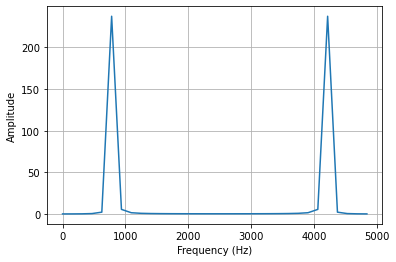

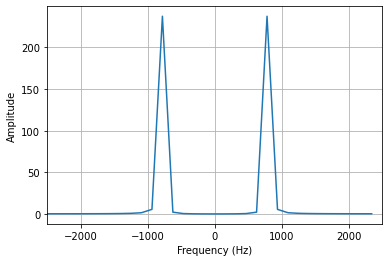

In [10]:
f, f2, Y_POW, Y_FT, ysamp, tsamp = signal_fourier(fsig, fsamp, Nsamp, get=True)

In [11]:
Peak_1, Peak_2 = Y_POW.argsort()[-1], Y_POW.argsort()[-2]
Peak_1_pos, Peak_2_pos = f2[Peak_1], f2[Peak_2]
print("Negative Peak occurs at {0:4.1f} Hz, and Positive Peak occurs ar {1:4.1f} Hz".format(Peak_1_pos, Peak_2_pos))

Negative Peak occurs at 781.2 Hz, and Positive Peak occurs ar -781.2 Hz


--------


## Task 4

We now observe the *FWHM* of the **Fourier Power Spectrum** 

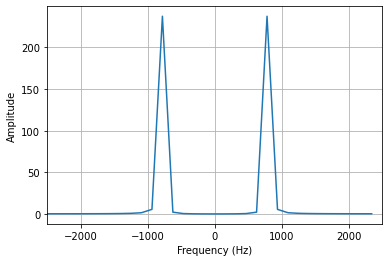

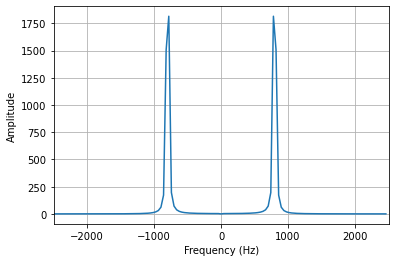

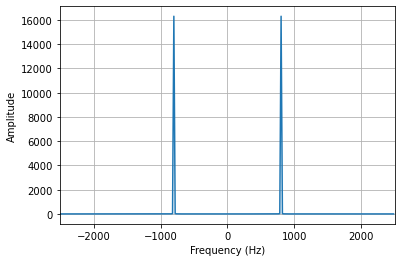

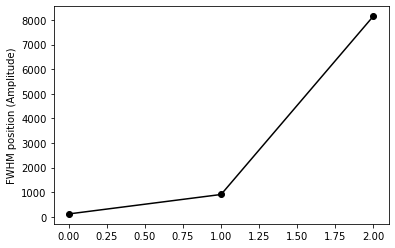

In [12]:
## Create a 'list' for the positions of FWHM
FWHM_pos = []

## Begin 'for' loop for each value we are observing
for i in [32, 128, 256]:
    f, f2, Y_POW, Y_FT, ysamp, tsamp = signal_fourier(800, 5000, i, get=True, show=False)
    FWHM_pos.append(max(Y_POW)//2)
    
plt.plot(np.real(FWHM_pos), 'ko')
plt.plot(np.real(FWHM_pos), 'k-')
plt.ylabel('FWHM position (Amplitude)')
plt.show()

The FWHM's position increases exponentially as Nsamps increases.

--------


## Task 5

We observe the *Nyquist Rate* of a signal

When `Fsig` is $800 Hz$, the *Nyquist Rate* will be $1600 Hz$

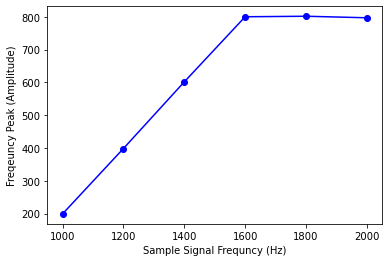

In [13]:
## Creat 'list's for frequency peaks and the sample signal that went with it 
freqPeak = []
sampSignal = []
for i in range(1000, 2200, 200):
    f, f2, Y_POW, Y_FT, ysamp, tsamp = signal_fourier(800, i, 256, get=True, show=False, showShift=False)

    freqPeak.append(abs(f2[np.argmax(Y_POW)]))
    sampSignal.append(i)

plt.plot(sampSignal, freqPeak, 'bo')
plt.plot(sampSignal, freqPeak, 'b-')
plt.xlabel('Sample Signal Frequncy (Hz)')
plt.ylabel('Freqeuncy Peak (Amplitude)')
plt.show()

It appears that there is a linear relationship between sample Signal and the Frequency peak until sample Signal reaches $1600 Hz$. After reaching this, the relationship switches, and Frequency peak stays relatively constant as sample Signal increases.

A formula that would represent the relationship below the *Nyquist Rate* would be 
### $$ y = mx + c $$
or
### $$ (FreqPeak) \simeq  (Freq - 800) $$
I have chosen the $-800$ as it appears the relationship is 1-to-1, with an offset of around 800.

From my observations, it appears that peaks in the spectrum do not get greater with increased sampling frequency passed the *Nyquist Rate*. It appears that mhigher frequency actually results in a **decrease**.

--------


## Task 6

We simulate noise in a signal

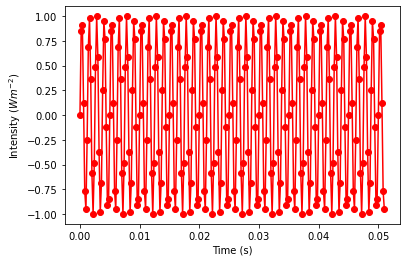

In [14]:
ysamp = signal_samp(800, 5000, 256, get=True)

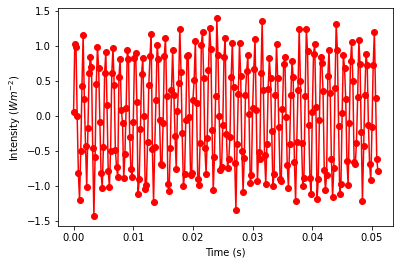

In [15]:
ysamp = signal_samp(800, 5000, 256, get=True, noise=True)

--------


## Task 7

In this part we simulate a noisy signal, and how to filter the noisy signal

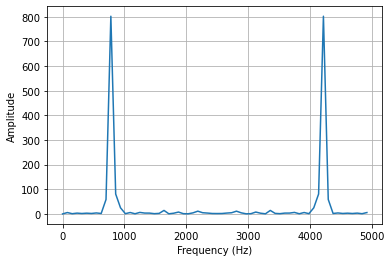

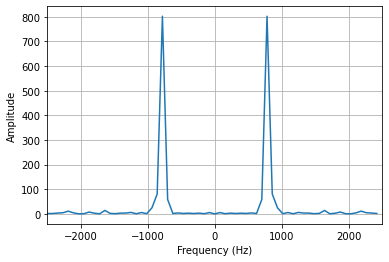

In [16]:
## Initialise our constants
fsig = 800
fsamp = 5000
Nsamp = 64

f, f2, Y_POW, Y_FT, ysamp, tsamp = signal_fourier(fsig, fsamp, Nsamp, get=True, noise=True)

C:\Users\Barry\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Barry\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


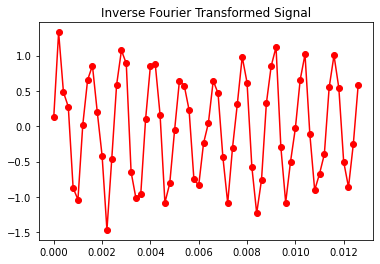

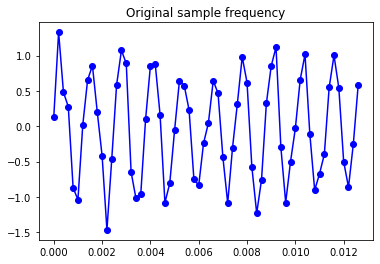

In [17]:
y_IFT = ifft(Y_FT)

plt.figure(1)
plt.plot(tsamp, y_IFT, 'ro')
plt.plot(tsamp, y_IFT, 'r-')
plt.title("Inverse Fourier Transformed Signal")

plt.figure(2)
plt.plot(tsamp, ysamp, 'bo')
plt.plot(tsamp, ysamp, 'b-')
plt.title("Original sample frequency")
plt.show()

C:\Users\Barry\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Barry\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


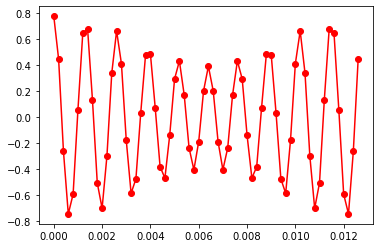

In [18]:
## Define Filtering array
Y_FT_filt = np.zeros(Nsamp)

## Begin 'for' loop to get filtered values
for i in range(Nsamp):
    if np.real(Y_FT[i]) > 4:   ## 9494.6
        Y_FT_filt[i] = np.real(Y_FT[i])

y_IFT = ifft(Y_FT_filt)

plt.plot(tsamp, y_IFT, 'ro')
plt.plot(tsamp, y_IFT, 'r-')
#plt.xlim(2500)
plt.show()

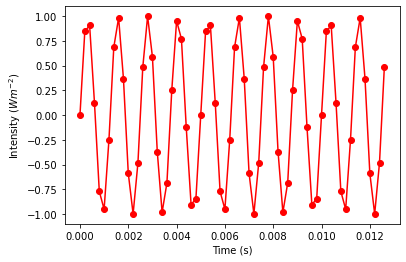

In [19]:
signal_samp(fsig, fsamp, Nsamp)

The Noise was removed but the Filtered signal doesn't seem to resemble the original signal.

--------


## Task 8

Here, we look at 2 signals incoming at the same time

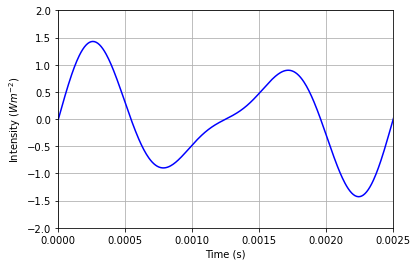

In [20]:
signal_sim(800, f2sig=1200)

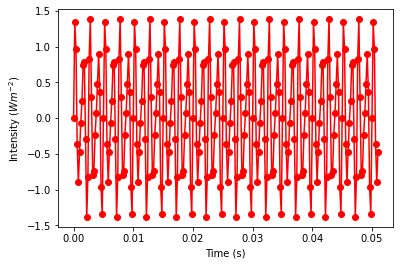

In [21]:
f1, f2 = 800, 1200
signal_samp(fsig=f1, f2sig=f2, fsamp=5000, Nsamp=256)

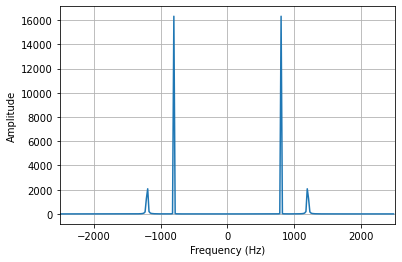

In [22]:
f1, f2 = 800, 1200
signal_fourier(fsig=f1, f2sig=f2, fsamp=5000, Nsamp=256, show=False)

Two clear peaks form at $+/- 800 Hz$ and $+/- 1200 Hz$

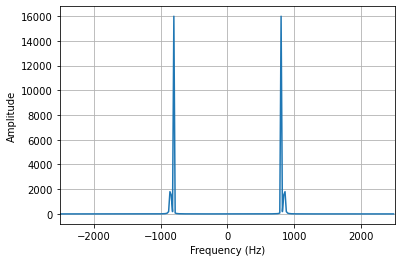

In [23]:
f1, f2 = 800, 850
signal_fourier(fsig=f1, f2sig=f2, fsamp=5000, Nsamp=256, show=False)

I found that around $850 Hz$ the peaks were still distinguishable

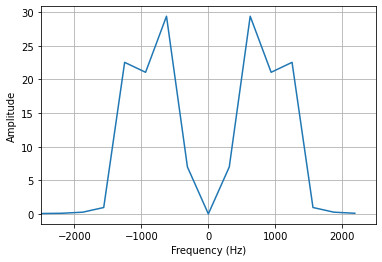

In [24]:
f1, f2 = 800, 1200
signal_fourier(fsig=f1, f2sig=f2, fsamp=5000, Nsamp=16, show=False)

As `Nsamps` is decreased the distinct spike at each frequency melds into eachother

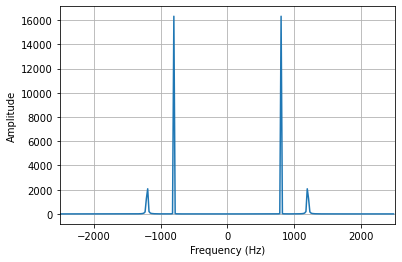

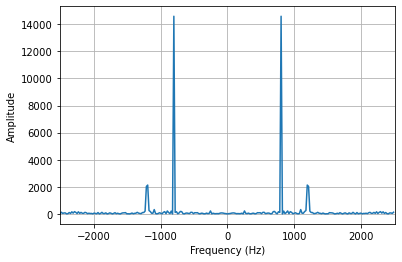

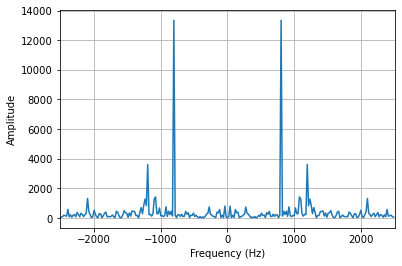

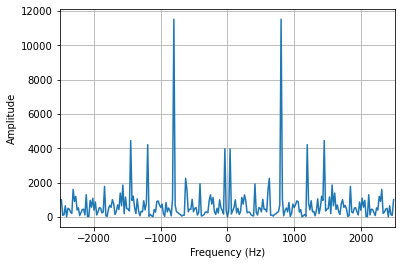

In [25]:
f1, f2 = 800, 1200
for i in range(4):
    signal_fourier(fsig=f1, f2sig=f2, fsamp=5000, Nsamp=256, show=False, noise=True, noise_amount=i*0.5)

Here, standard deviation of the Gaussian Noise increases by 0.5 in each graph (starting at 0 noise)

By a std. dev. of 2, we see that there is a noticeable peak at 1200 Hz, but it is not much different to the peak at 1900 Hz